# **Анализ активных продаж продукции в Python**

Импортируем библиотеки

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/product-sales/Order_details-masked.csv


Импортируем файл

In [2]:
df = pd.read_csv('/kaggle/input/product-sales/Order_details-masked.csv')

Смотрим первые 15 строк таблицы

# Проверка и очистка данных

In [3]:
df.head(15)

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
5,PERSON_6,PERSON_6@gmail.com,"PRODUCT_34,PRODUCT_66,PRODUCT_58,PRODUCT_83",01/03/2021 11:06:34
6,PERSON_7,PERSON_7@gmail.com,PRODUCT_75,01/03/2021 12:02:00
7,PERSON_8,PERSON_8@gmail.com,"PRODUCT_63,PRODUCT_90,PRODUCT_27,PRODUCT_5",01/03/2021 12:31:10
8,PERSON_9,PERSON_9@outlook.com,PRODUCT_26,01/03/2021 12:51:46
9,PERSON_10,PERSON_10@gmail.com,PRODUCT_63,01/03/2021 12:52:29


Получим общую информацию о таблице

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


Проверим на количество пропущенных элементов и выбросов

In [5]:
df.isna().sum()

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

Как видим пропущенных элементов нет. Теперь преобразуем колонну Transaction Date из типа object в тип datetime. Это нужно для того, чтобы извлечь часы из таблицы и узнать период, который охватывает эти данные

In [6]:
df['DateTime'] = pd.to_datetime(df['Transaction Date'])
df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

Проверямем результат

In [7]:
df = df.drop(columns = 'Transaction Date')
df.head(17)

,Name,Email,Product,DateTime,Date,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,2021-01-03 00:47:26,2021-01-03,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,2021-01-03 02:04:07,2021-01-03,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,2021-01-03 09:10:43,2021-01-03,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,2021-01-03 09:49:48,2021-01-03,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",2021-01-03 10:56:46,2021-01-03,10
5,PERSON_6,PERSON_6@gmail.com,"PRODUCT_34,PRODUCT_66,PRODUCT_58,PRODUCT_83",2021-01-03 11:06:34,2021-01-03,11
6,PERSON_7,PERSON_7@gmail.com,PRODUCT_75,2021-01-03 12:02:00,2021-01-03,12
7,PERSON_8,PERSON_8@gmail.com,"PRODUCT_63,PRODUCT_90,PRODUCT_27,PRODUCT_5",2021-01-03 12:31:10,2021-01-03,12
8,PERSON_9,PERSON_9@outlook.com,PRODUCT_26,2021-01-03 12:51:46,2021-01-03,12
9,PERSON_10,PERSON_10@gmail.com,PRODUCT_63,2021-01-03 12:52:29,2021-01-03,12


# Анализ данных

Смотрим с какого по какое нам даны данные. В нашем случае данные охватывают период с 2021.01.03 (третьего января) по 2021.07.03(третье июля)

In [8]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Data covers period from {start_date} to {end_date}")

Data covers period from 2021-01-03 to 2021-07-03


Теперь мы найдем самые загруженные часы. Для этого в колонне "Hour" посчитаем значения и присвоим индексы, для удобства превратим их список. Теперь мы можем посмотреть в какое время происходит наибольшее количество покупок

In [9]:
timemost1 = df['Hour'].value_counts().index.tolist()[:24]
timemost2 = df['Hour'].value_counts().values.tolist()[:24]
tmost = np.column_stack((timemost1,timemost2))
print(" Hour Of Day" + "\t" + "Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


Из этого списка мы можем сделать вывод, что чаще всего покупатели делают заказы в 23 и 12 часов и меньше всего в 3 часа. 

Для наглядности визуализируем распределение продаж по часам при помощи гистограммы

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


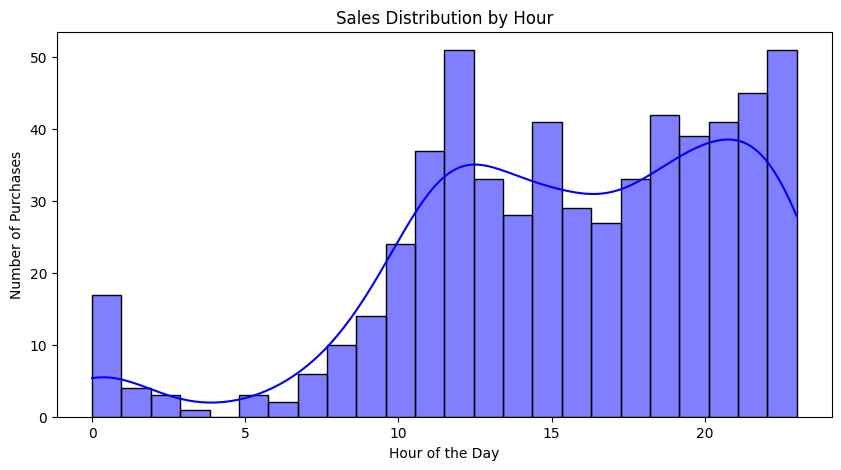

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour"], bins=24, kde=True, color="blue")
plt.title("Sales Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Purchases")
plt.show()

Проверим распределение продаж по месяцам

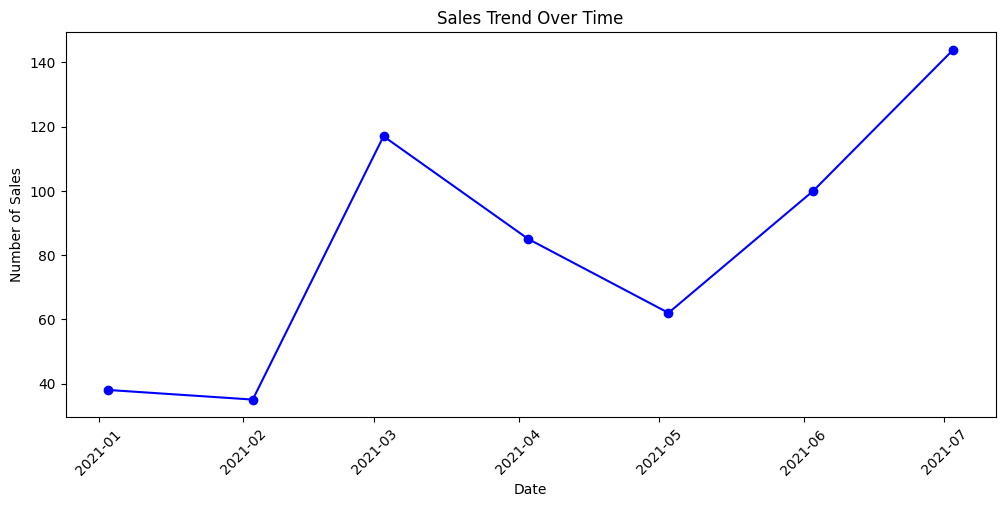

In [11]:
plt.figure(figsize=(12,5))
sales_month = df['Date'].value_counts().sort_index()
sales_month.plot(kind = 'line', marker = 'o', color = "blue")
plt.title("Sales Trend Over Time")
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.show()

Мы можем заметить как продажи увеличились со 2-го по 3-ий месяц почти в 3 раза, потом упали до 70 с 3-го по 5-ый месяц и вновь поднялись с 5-го по 7-ой. Мы можем рассчитать процентное изменение в эти периоды. Для этого мы используем формулу:
> **Percentage Increase Formula:**
$$
\text{Percentage Increase} = \left(\frac{\text{New Value} - \text{Old Value}}{\text{Old Value}}\right) \times 100\%
$$
Теперь посчитаем изменения в процентах с 40 до 120:
$$
\left(\frac{120 - 40}{40}\right) \times 100 = \left(\frac{80}{40}\right) \times 100 = 200\%
$$
Теперь с 120 до 70:
$$
\left(\frac{70 - 120}{120}\right) \times 100 = \left(\frac{-50}{120}\right) \times 100 \approx -41.67\%
$$
И с 70 до 140:
$$
\left(\frac{140 - 70}{70}\right) \times 100 = \left(\frac{70}{70}\right) \times 100 = 100\%
$$

Таким образом мы узнали, что продажи сначала увеличились на **200%** потом уменьшились на **41.76%** и увеличились на **100%**



Теперь узнаем какие продукты являются самыми популярными и не популярными среди пользователей. Для этого сначала преобразуем строку и укажем запятую как разделитель. Теперь посчитаем сколько раз был заказан каждый товар, выделим среди них 10 самыйх часто заказываемых и редко заказываемых. Для вывода используем столбчатую диаграмму


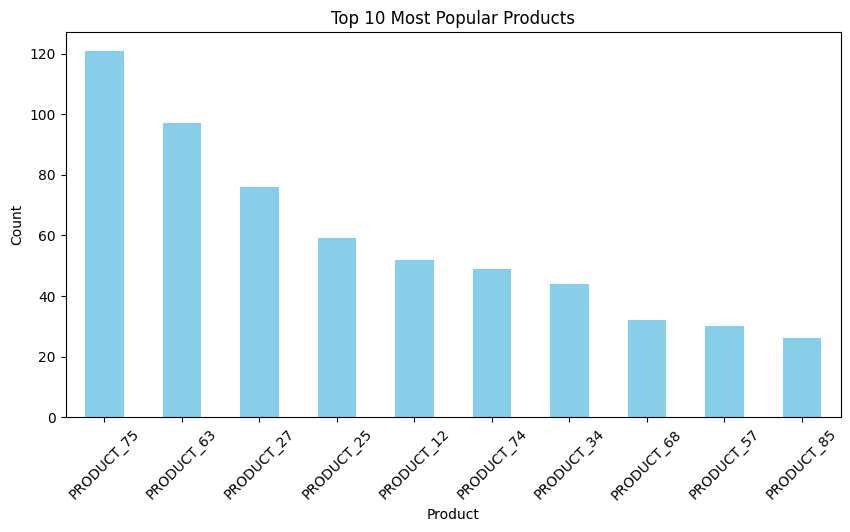

In [12]:
all_products = df["Product"].str.split(",").explode()
popular_products = all_products.value_counts()
plt.figure(figsize=(10, 5))
popular_products.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

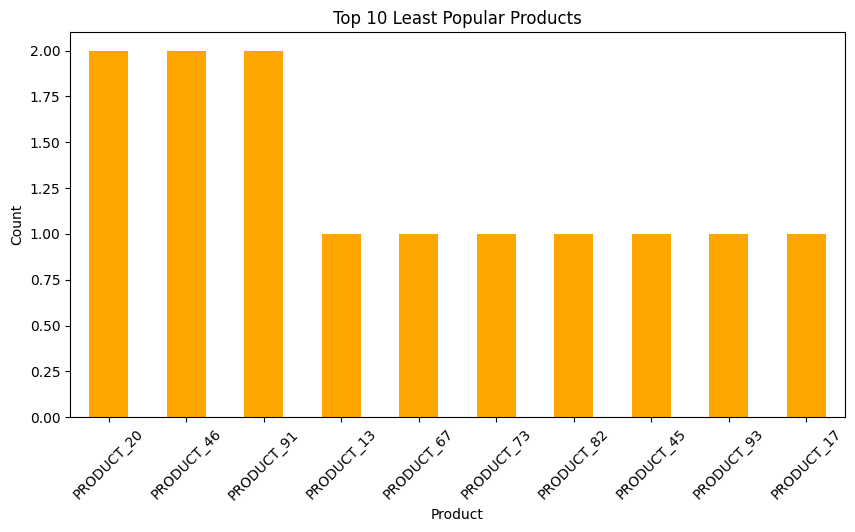

In [13]:
all_products = df["Product"].str.split(",").explode()
popular_products = all_products.value_counts()
plt.figure(figsize=(10, 5))
popular_products.tail(10).plot(kind="bar", color="Orange")
plt.title("Top 10 Least Popular Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

На графике мы можем заметить, что PRODUCT_75 является самым популярным продуктом среди пользователей. Его заказали около 120 раз. Вторым по популярности является продукт PRODUCT_63, который был заказан около 100 раз. В это же время самыми не популярными продуктами являются PRODUCT_13, PRODUCT_67, PRODUCT_73, PRODUCT_82, PRODUCT_45, PRODUCT_93 и PRODUCT_17. За все время их заказали всего по одному разу.

Узнаем самые популярные пары продкутов, которые заказывают пользователи. Для этого используем библиотеки itertools и collections. После разделим списки товаров и подсчитаем частоты пар товаров. Теперь выведем топ-10 самых популярных пар.

In [14]:
from itertools import combinations
from collections import Counter

basket = df["Product"].apply(lambda x: x.split(","))
combination_counts = Counter()
for products in basket:
    combination_counts.update(combinations(sorted(products), 2))
most_common_combinations = combination_counts.most_common(10)
print("Top 10 Most Common Product Pairs")
print(most_common_combinations)

Top 10 Most Common Product Pairs
[(('PRODUCT_27', 'PRODUCT_63'), 28), (('PRODUCT_68', 'PRODUCT_75'), 20), (('PRODUCT_12', 'PRODUCT_85'), 17), (('PRODUCT_63', 'PRODUCT_75'), 16), (('PRODUCT_12', 'PRODUCT_55'), 15), (('PRODUCT_34', 'PRODUCT_66'), 14), (('PRODUCT_12', 'PRODUCT_61'), 14), (('PRODUCT_12', 'PRODUCT_62'), 14), (('PRODUCT_28', 'PRODUCT_61'), 14), (('PRODUCT_49', 'PRODUCT_85'), 14)]


Для упрощения понимания создадим столбчатую диаграмму и покажем топ-10 популярных пар

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


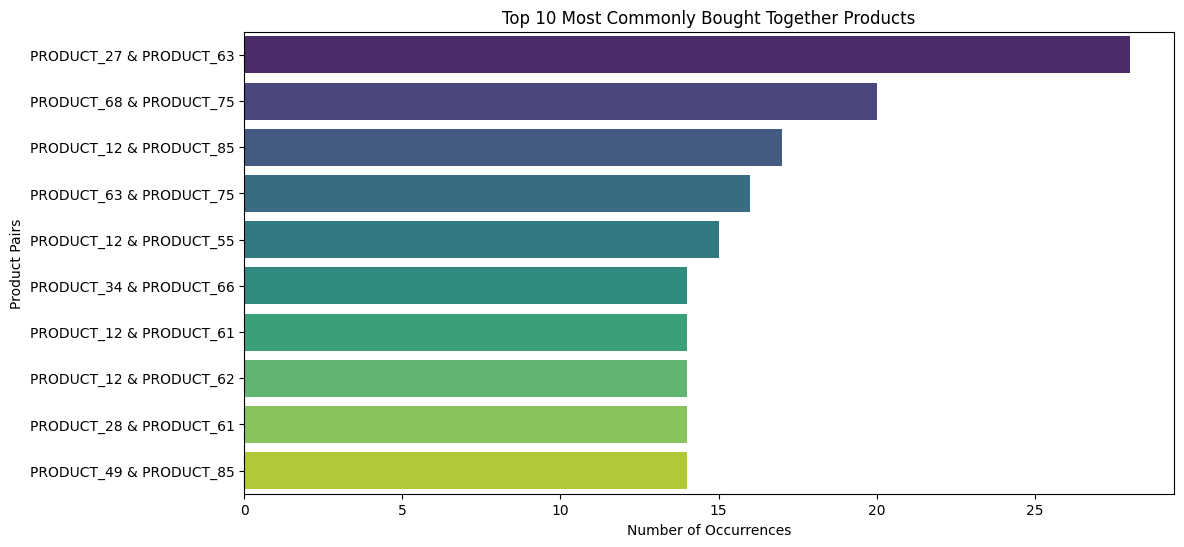

In [15]:
pairs, counts = zip(*most_common_combinations)
labels = [f"{p1} & {p2}" for p1, p2 in pairs]
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=labels, palette="viridis")
plt.xlabel("Number of Occurrences")
plt.ylabel("Product Pairs")
plt.title("Top 10 Most Commonly Bought Together Products")
plt.show()

Смотря на график становится понятно, что люди чаще всего покупают в паре продукты PRODUCT_27 и PRODUCT_63. Следующей парой по популярности идет пара PRODUCT_68 и PRODUCT_75.

# Выводы

1. Период данных

       Исследуемые данные охватывают с 3 января 2021 года по 3 июля 2021 года.


2. Активность пользователей

       Наибольшее количество покупок совершается в 23:00 и 12:00.
       Наименьшее число заказов наблюдается в 3:00 ночи.


3. Динамика продаж

       Продажи выросли в 3 раза со 2-го по 3-й месяц.
       Затем они упали на 41.76% с 3-го по 5-й месяц.
       С 5-го по 7-й месяц продажи снова выросли на 100%.


4. Популярные и непопулярные товары

       PRODUCT_75 – самый популярный товар (≈120 продаж).
       PRODUCT_63 – второй по популярности (≈100 продаж).
       PRODUCT_13, PRODUCT_67, PRODUCT_73, PRODUCT_82, PRODUCT_45, PRODUCT_93 и PRODUCT_17 – наименее популярные товары (заказаны всего по 1 разу).


5. Часто покупаемые вместе товары

       Самая популярная пара товаров – PRODUCT_27 и PRODUCT_63.
       Вторая по популярности пара – PRODUCT_68 и PRODUCT_75.